In [1]:
# Dependencies
import requests
import json
from pprint import pprint
import pandas as pd
from config_api import aqapi_key
import matplotlib.pyplot as plt

# Import the API key
#api_key = 'cb503ec3147e999a13e96259130ed78081483d6b'
city = 'Newark'
url = f'https://api.waqi.info/feed/{city}/?token={aqapi_key}'

In [2]:
air_quality = requests.get(url).json()

In [3]:
pprint(air_quality['data'])

{'aqi': 26,
 'attributions': [{'logo': 'US-NJDEC.png',
                   'name': 'NJDEP/DAQ - New Jersey Department of Environmental '
                           'Protection - Division of Air Quality',
                   'url': 'http://www.nj.gov/dep/daq/'},
                  {'name': 'Air Now - US EPA', 'url': 'http://www.airnow.gov/'},
                  {'name': 'World Air Quality Index Project',
                   'url': 'https://waqi.info/'}],
 'city': {'geo': [40.72102, -74.1928],
          'location': '',
          'name': 'Newark Firehouse, NewJersey, USA',
          'url': 'https://aqicn.org/city/usa/newjersey/newark-firehouse'},
 'debug': {'sync': '2022-09-26T20:36:54+09:00'},
 'dominentpol': 'pm25',
 'forecast': {'daily': {'o3': [{'avg': 11,
                                'day': '2022-09-24',
                                'max': 18,
                                'min': 7},
                               {'avg': 10,
                                'day': '2022-09-25',
  

In [4]:
ny_airquality = pd.read_csv('new-york-air-quality.csv')
ny_airquality.head()

,date,pm25,o3,no2,co
0,8/2/2024,44,,,
1,7/2/2024,19,,,
2,7/3/2024,16,,,
3,7/4/2024,33,,,
4,7/5/2024,70,,,


In [5]:
print(ny_airquality.shape)

(3812, 5)


In [6]:
ny_airquality.isna().sum()

date     5
 pm25    1
 o3      5
 no2     1
 co      1
dtype: int64

In [7]:
ny_airquality_df = ny_airquality.dropna()

In [8]:
ny_airquality_df.isna().sum()

date     0
 pm25    0
 o3      0
 no2     0
 co      0
dtype: int64

In [9]:
print(ny_airquality_df.shape)

(3807, 5)


In [10]:
ny_airquality_df.head()

,date,pm25,o3,no2,co
0,8/2/2024,44,,,
1,7/2/2024,19,,,
2,7/3/2024,16,,,
3,7/4/2024,33,,,
4,7/5/2024,70,,,


In [11]:
ny_airquality_df['date'] = pd.to_datetime(ny_airquality_df['date'], format='%m/%d/%Y')

C:\Users\ambmd\AppData\Local\Temp\ipykernel_19920\1334045109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_airquality_df['date'] = pd.to_datetime(ny_airquality_df['date'], format='%m/%d/%Y')


In [12]:
ny_airquality_df[' pm25'] = pd.to_numeric(ny_airquality_df[' pm25'])

C:\Users\ambmd\AppData\Local\Temp\ipykernel_19920\1652456466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_airquality_df[' pm25'] = pd.to_numeric(ny_airquality_df[' pm25'])


In [13]:
ny_airquality_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3807 entries, 0 to 3806
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3807 non-null   datetime64[ns]
 1    pm25   3807 non-null   int64         
 2    o3     3807 non-null   object        
 3    no2    3807 non-null   object        
 4    co     3807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 178.5+ KB


In [151]:
import calplot

In [15]:
ny_airquality_df = ny_airquality_df.set_index('date')

In [16]:
ny_airquality_df.head()

,pm25,o3,no2,co
date,,,,
2024-08-02,44,,,
2024-07-02,19,,,
2024-07-03,16,,,
2024-07-04,33,,,
2024-07-05,70,,,


In [150]:
import warnings
warnings.filterwarnings("ignore")

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


(<Figure size 1250x1870 with 12 Axes>,
 array([<Axes: ylabel='2014'>, <Axes: ylabel='2015'>,
        <Axes: ylabel='2016'>, <Axes: ylabel='2017'>,
        <Axes: ylabel='2018'>, <Axes: ylabel='2019'>,
        <Axes: ylabel='2020'>, <Axes: ylabel='2021'>,
        <Axes: ylabel='2022'>, <Axes: ylabel='2023'>,
        <Axes: ylabel='2024'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

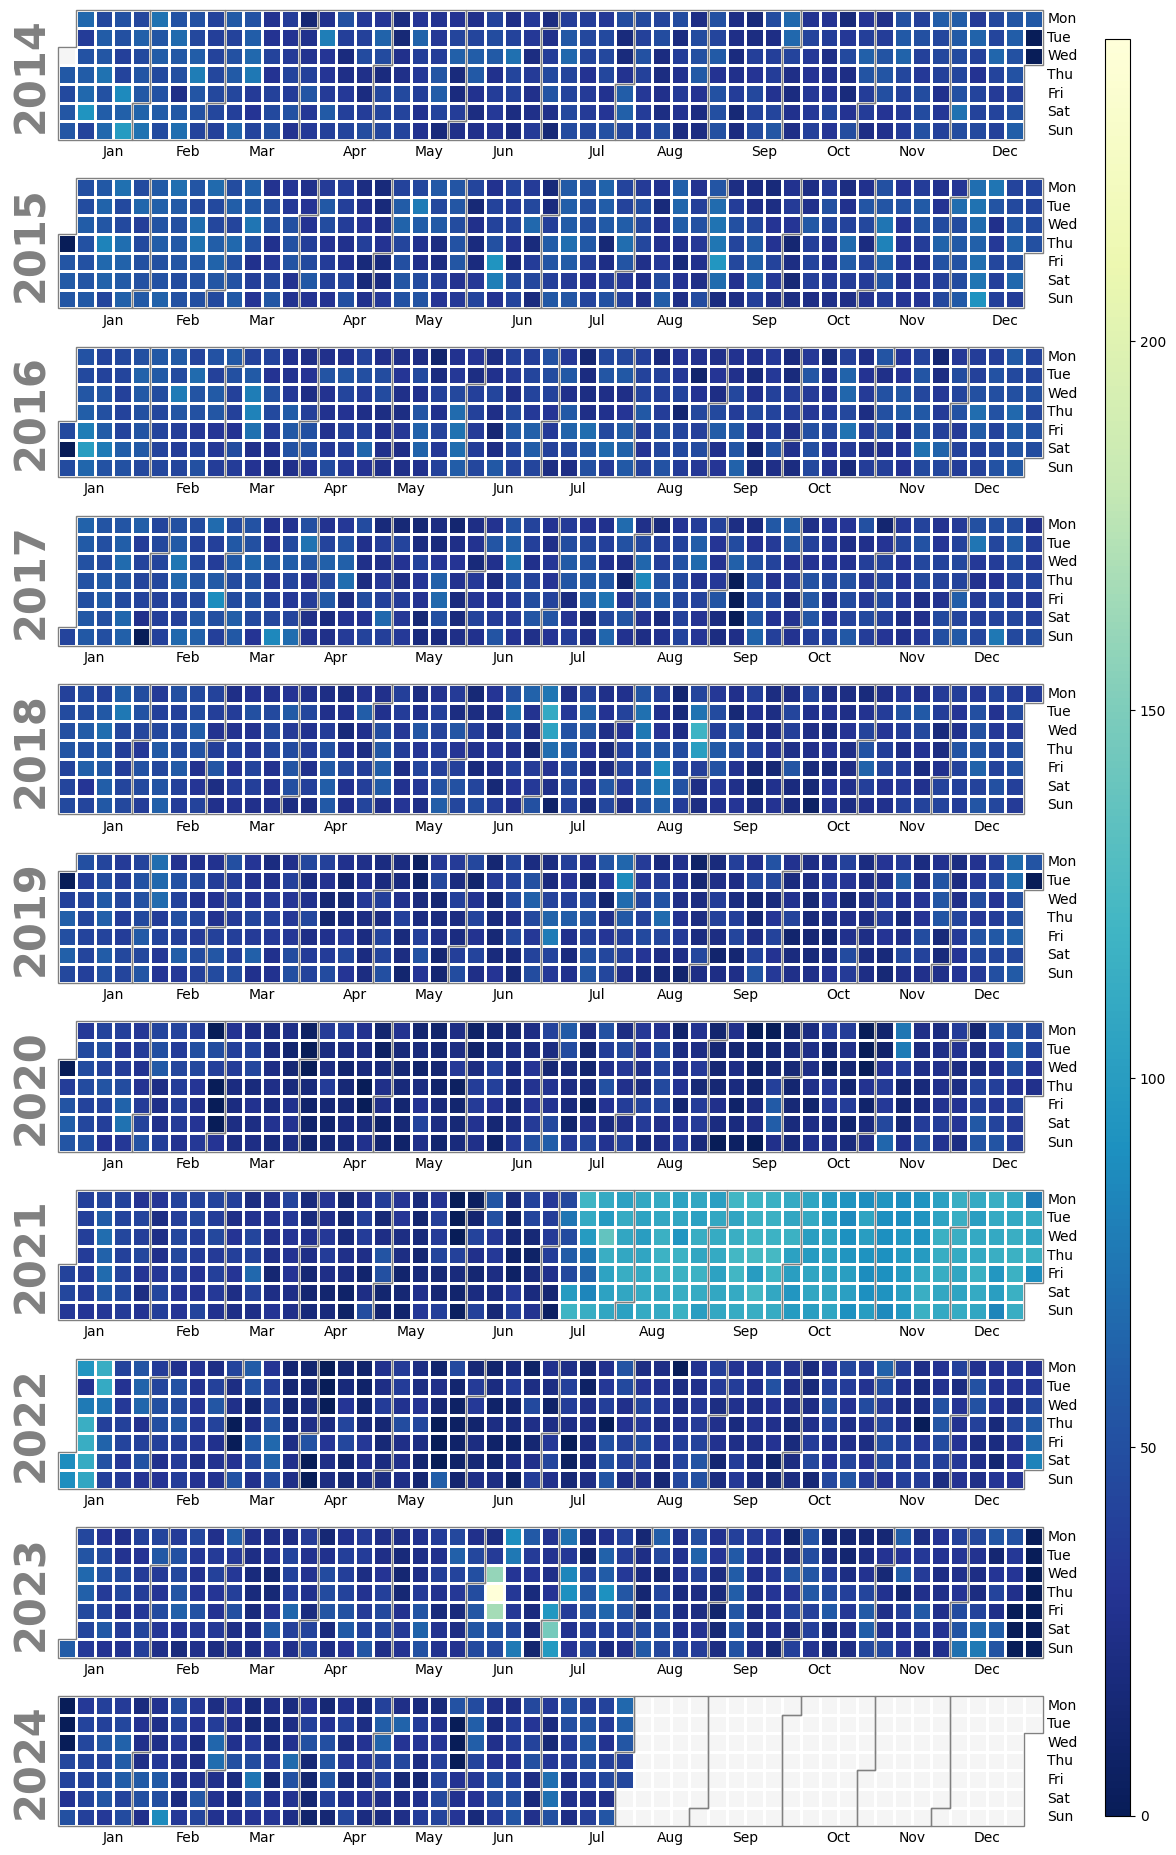

In [18]:
calplot.calplot(ny_airquality_df[' pm25'], cmap='YlGnBu_r')

In [77]:
#EXAMPLE
#https://aqs.epa.gov/data/api/annualData/byState?email=test@aqs.api&key=test&param=45201&bdate=19950515&edate=19950515&state=37
api_key = 'bolecat29'
email = 'brendandoucette2021@gmail.com'
url = f'https://aqs.epa.gov/data/api/list/states?email={email}&key={api_key}'
response = requests.get(url).json()
pprint(response)

{'Data': [{'code': '01', 'value_represented': 'Alabama'},
          {'code': '02', 'value_represented': 'Alaska'},
          {'code': '04', 'value_represented': 'Arizona'},
          {'code': '05', 'value_represented': 'Arkansas'},
          {'code': '06', 'value_represented': 'California'},
          {'code': '08', 'value_represented': 'Colorado'},
          {'code': '09', 'value_represented': 'Connecticut'},
          {'code': '10', 'value_represented': 'Delaware'},
          {'code': '11', 'value_represented': 'District Of Columbia'},
          {'code': '12', 'value_represented': 'Florida'},
          {'code': '13', 'value_represented': 'Georgia'},
          {'code': '15', 'value_represented': 'Hawaii'},
          {'code': '16', 'value_represented': 'Idaho'},
          {'code': '17', 'value_represented': 'Illinois'},
          {'code': '18', 'value_represented': 'Indiana'},
          {'code': '19', 'value_represented': 'Iowa'},
          {'code': '20', 'value_represented': 'Kansas'}

In [104]:
api_key = 'bolecat29'
email = 'brendandoucette2021@gmail.com'
url = f'https://aqs.epa.gov/data/api/metaData/fieldsByService?email={email}&key={api_key}&service=list'
response = requests.get(url).json()
pprint(response)

{'Data': [{'field_description': 'A short numberic or character "code" used to '
                                'represent something else in the database.  '
                                'Used to make data entry easier.  For example, '
                                'state_code 01 represents Alabama.',
           'field_name': 'code'},
          {'field_description': None, 'field_name': 'value_represented'}],
 'Header': [{'request_time': '2024-08-07T18:33:01-04:00',
             'rows': 2,
             'status': 'Success',
             'url': 'https://aqs.epa.gov/data/api/metaData/fieldsByService?email=brendandoucette2021@gmail.com&key=bolecat29&service=list'}]}


In [92]:
api_key = 'bolecat29'
email = 'brendandoucette2021@gmail.com'
url = f'https://aqs.epa.gov/data/api/list/countiesByState?email={email}&key={api_key}&state=34'
response = requests.get(url).json()
pprint(response)

{'Data': [{'code': '001', 'value_represented': 'Atlantic'},
          {'code': '003', 'value_represented': 'Bergen'},
          {'code': '005', 'value_represented': 'Burlington'},
          {'code': '007', 'value_represented': 'Camden'},
          {'code': '009', 'value_represented': 'Cape May'},
          {'code': '011', 'value_represented': 'Cumberland'},
          {'code': '013', 'value_represented': 'Essex'},
          {'code': '015', 'value_represented': 'Gloucester'},
          {'code': '017', 'value_represented': 'Hudson'},
          {'code': '019', 'value_represented': 'Hunterdon'},
          {'code': '021', 'value_represented': 'Mercer'},
          {'code': '023', 'value_represented': 'Middlesex'},
          {'code': '025', 'value_represented': 'Monmouth'},
          {'code': '027', 'value_represented': 'Morris'},
          {'code': '029', 'value_represented': 'Ocean'},
          {'code': '031', 'value_represented': 'Passaic'},
          {'code': '033', 'value_represented': 'S

In [96]:
api_key = 'bolecat29'
email = 'brendandoucette2021@gmail.com'
url = f'https://aqs.epa.gov/data/api/list/parametersByClass?email={email}&key={api_key}&pc=CRITERIA'
response = requests.get(url).json()
pprint(response)

{'Data': [{'code': '14129', 'value_represented': 'Lead (TSP) LC'},
          {'code': '42101', 'value_represented': 'Carbon monoxide'},
          {'code': '42401', 'value_represented': 'Sulfur dioxide'},
          {'code': '42602', 'value_represented': 'Nitrogen dioxide (NO2)'},
          {'code': '44201', 'value_represented': 'Ozone'},
          {'code': '81102', 'value_represented': 'PM10 Total 0-10um STP'},
          {'code': '85129', 'value_represented': 'Lead PM10 LC FRM/FEM'},
          {'code': '88101', 'value_represented': 'PM2.5 - Local Conditions'}],
 'Header': [{'request_time': '2024-08-07T18:24:20-04:00',
             'rows': 8,
             'status': 'Success',
             'url': 'https://aqs.epa.gov/data/api/list/parametersByClass?email=brendandoucette2021@gmail.com&key=bolecat29&pc=CRITERIA'}]}


In [78]:
len(response['Data'])

56

In [148]:
api_key = 'bolecat29'
email = 'brendandoucette2021@gmail.com'
try_url = f'https://aqs.epa.gov/data/api/annualData/byCounty?email={email}&key={api_key}&param=88101&bdate=20200101&edate=20200229&state=34&county=007'
response = requests.get(try_url).json()
pprint(response['Data'])

[{'arithmetic_mean': 8.473611,
  'cbsa': 'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD',
  'cbsa_code': '37980',
  'certification_indicator': 'Requested but denied',
  'city': 'Camden',
  'county': 'Camden',
  'county_code': '007',
  'date_of_last_change': '2024-05-18',
  'datum': 'NAD83',
  'event_type': 'No Events',
  'exceptional_data_count': 0,
  'fiftieth_percentile': 7.6,
  'first_max_datetime': '2020-12-11 00:00',
  'first_max_n_o_datetime': None,
  'first_max_nonoverlap_value': None,
  'first_max_value': 20.6,
  'fourth_max_datetime': '2020-09-24 00:00',
  'fourth_max_value': 15.9,
  'latitude': 39.934559,
  'local_site_name': 'Camden Spruce Street',
  'longitude': -75.125219,
  'method': 'R & P Model 2025 PM-2.5 Sequential Air Sampler w/VSCC - '
            'Gravimetric',
  'metric_used': 'Daily Mean',
  'ninetieth_percentile': 12.6,
  'ninety_eighth_percentile': 19.5,
  'ninety_fifth_percentile': 15.9,
  'ninety_ninth_percentile': 20.6,
  'null_observation_count': 2,
  'observ

In [145]:
#https://aqs.epa.gov/data/api/annualData/byState?email=test@aqs.api&key=test&param=45201&bdate=19950515&edate=19950515&state=37
api_key = 'bolecat29'
email = 'brendandoucette2021@gmail.com'
#url = f'https://aqs.epa.gov/data/api/list/states?email={email}&key={api_key}'
url = f'https://aqs.epa.gov/data/api/dailyData/bySite?email={email}&key={api_key}&param=88101&bdate=20200102&edate=20200102&state=34&county=007&site=0002'
response = requests.get(url).json()
pprint(len(response['Data']))

9


In [143]:
camden = nj_2020.loc[nj_2020['county Name'] == 'Camden', :]
camden.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
171180,New Jersey,Camden,34,7,2020-01-01,30,Good,Ozone,34-007-0002,2
171181,New Jersey,Camden,34,7,2020-01-02,52,Moderate,PM2.5,34-007-0002,1
171182,New Jersey,Camden,34,7,2020-01-03,40,Good,PM2.5,34-007-0002,1
171183,New Jersey,Camden,34,7,2020-01-04,57,Moderate,PM2.5,34-007-0002,2
171184,New Jersey,Camden,34,7,2020-01-05,30,Good,Ozone,34-007-0002,1


In [147]:
camden['Defining Site'].value_counts()

Defining Site
34-007-0002    261
34-007-1001     99
34-007-1007      6
Name: count, dtype: int64

In [26]:
usa_2020 = pd.read_csv('daily_aqi_by_county_2020.csv')
usa_2020.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2020-01-01,48,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2020-01-04,13,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2020-01-07,14,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2020-01-10,39,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2020-01-13,29,Good,PM2.5,01-003-0010,1


In [132]:
nj_2020 = usa_2020.loc[usa_2020['State Name'] == 'New Jersey', :]
nj_2020

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
170457,New Jersey,Atlantic,34,1,2020-01-01,24,Good,Ozone,34-001-0006,2
170458,New Jersey,Atlantic,34,1,2020-01-02,32,Good,PM2.5,34-001-0006,1
170459,New Jersey,Atlantic,34,1,2020-01-03,24,Good,Ozone,34-001-0006,1
170460,New Jersey,Atlantic,34,1,2020-01-04,33,Good,PM2.5,34-001-0006,2
170461,New Jersey,Atlantic,34,1,2020-01-05,27,Good,Ozone,34-001-0006,1
...,...,...,...,...,...,...,...,...,...,...
175924,New Jersey,Warren,34,41,2020-12-27,51,Moderate,PM2.5,34-041-0007,1
175925,New Jersey,Warren,34,41,2020-12-28,55,Moderate,PM2.5,34-041-0007,1
175926,New Jersey,Warren,34,41,2020-12-29,30,Good,Ozone,34-041-0007,1
175927,New Jersey,Warren,34,41,2020-12-30,27,Good,Ozone,34-041-0007,1


In [54]:
nj_2020['county Name'].value_counts()

county Name
Camden        366
Essex         366
Hudson        366
Mercer        366
Middlesex     366
Morris        366
Union         366
Cumberland    365
Bergen        364
Hunterdon     364
Warren        361
Atlantic      359
Ocean         356
Passaic       262
Gloucester    253
Monmouth      226
Name: count, dtype: int64

In [39]:
nj_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5472 entries, 170457 to 175928
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   State Name                 5472 non-null   object
 1   county Name                5472 non-null   object
 2   State Code                 5472 non-null   int64 
 3   County Code                5472 non-null   int64 
 4   Date                       5472 non-null   object
 5   AQI                        5472 non-null   int64 
 6   Category                   5472 non-null   object
 7   Defining Parameter         5472 non-null   object
 8   Defining Site              5472 non-null   object
 9   Number of Sites Reporting  5472 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 470.2+ KB


In [28]:
print(nj_2020['county Name'].unique())
print(nj_2020['county Name'].nunique())

['Atlantic' 'Bergen' 'Camden' 'Cumberland' 'Essex' 'Gloucester' 'Hudson'
 'Hunterdon' 'Mercer' 'Middlesex' 'Monmouth' 'Morris' 'Ocean' 'Passaic'
 'Union' 'Warren']
16


In [55]:
nj_2020_grouped = nj_2020.groupby(['county Name'])
means = nj_2020_grouped["AQI"].mean()
means

county Name
Atlantic      35.194986
Bergen        41.131868
Camden        41.420765
Cumberland    38.852055
Essex         41.314208
Gloucester    36.581028
Hudson        39.439891
Hunterdon     38.398352
Mercer        39.819672
Middlesex     39.237705
Monmouth      37.765487
Morris        35.581967
Ocean         34.685393
Passaic       36.366412
Union         39.133880
Warren        35.941828
Name: AQI, dtype: float64

In [56]:
maxes = nj_2020_grouped["AQI"].max()
maxes

county Name
Atlantic       90
Bergen        119
Camden         87
Cumberland     71
Essex         127
Gloucester    101
Hudson         90
Hunterdon      85
Mercer        112
Middlesex     112
Monmouth       93
Morris         84
Ocean          84
Passaic       100
Union         111
Warren        100
Name: AQI, dtype: int64

In [57]:
mins = nj_2020_grouped["AQI"].min()
mins

county Name
Atlantic       2
Bergen         0
Camden        15
Cumberland     0
Essex          6
Gloucester     8
Hudson        15
Hunterdon     17
Mercer        16
Middlesex     16
Monmouth       0
Morris         1
Ocean          7
Passaic        6
Union          5
Warren         1
Name: AQI, dtype: int64

In [63]:
counts = nj_2020_grouped['Defining Parameter'].value_counts()
counts

county Name  Defining Parameter
Atlantic     Ozone                 244
             PM2.5                 115
Bergen       Ozone                 159
             PM2.5                 136
             NO2                    66
             CO                      3
Camden       Ozone                 202
             PM2.5                 154
             NO2                    10
Cumberland   Ozone                 206
             PM2.5                 155
             NO2                     4
Essex        Ozone                 161
             PM2.5                 141
             NO2                    63
             CO                      1
Gloucester   Ozone                 203
             PM2.5                  50
Hudson       Ozone                 177
             PM2.5                 101
             NO2                    88
Hunterdon    Ozone                 242
             PM2.5                 122
Mercer       Ozone                 262
             PM2.5              

In [65]:
nj_2020_grouped['Defining Site'].value_counts()

county Name  Defining Site
Atlantic     34-001-0006      357
             34-001-1006        2
Bergen       34-003-0010      209
             34-003-0006      155
Camden       34-007-0002      261
             34-007-1001       99
             34-007-1007        6
Cumberland   34-011-0007      365
Essex        34-013-0003      366
Gloucester   34-015-0002      253
Hudson       34-017-0006      212
             34-017-1003      109
             34-017-1002       43
             34-017-0008        2
Hunterdon    34-019-0001      364
Mercer       34-021-0005      189
             34-021-9991      158
             34-021-0008       19
Middlesex    34-023-0011      366
Monmouth     34-025-0005      226
Morris       34-027-3001      366
Ocean        34-029-0006      208
             34-029-2002      148
Passaic      34-031-5001      244
             34-031-0005       18
Union        34-039-0004      343
             34-039-2003       21
             34-039-0003        2
Warren       34-041-0

In [41]:
x_axis = [i for i in means]
x_axis

[35.1949860724234,
 41.13186813186813,
 41.4207650273224,
 38.85205479452055,
 41.314207650273225,
 36.58102766798419,
 39.439890710382514,
 38.39835164835165,
 39.81967213114754,
 39.23770491803279,
 37.76548672566372,
 35.58196721311475,
 34.68539325842696,
 36.36641221374046,
 39.13387978142077,
 35.94182825484764]

In [42]:
nj_2020['county Name'].unique()

array(['Atlantic', 'Bergen', 'Camden', 'Cumberland', 'Essex',
       'Gloucester', 'Hudson', 'Hunterdon', 'Mercer', 'Middlesex',
       'Monmouth', 'Morris', 'Ocean', 'Passaic', 'Union', 'Warren'],
      dtype=object)

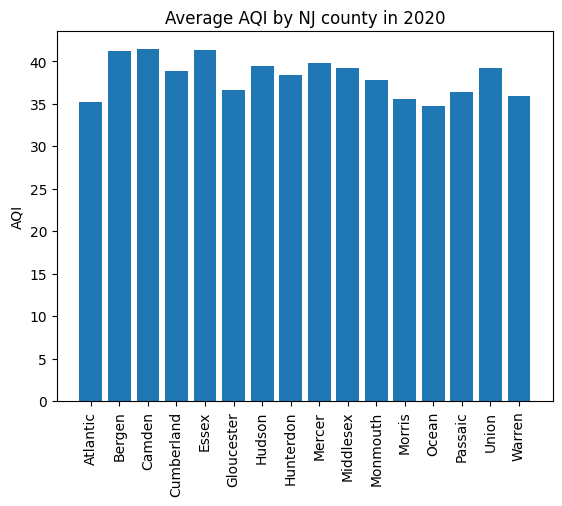

In [60]:
plt.bar(nj_2020['county Name'].unique(), x_axis)
plt.xticks(rotation = 'vertical')
plt.ylabel('AQI')
plt.title("Average AQI by NJ county in 2020")
plt.show()

In [44]:
nj_2020['Defining Parameter'].value_counts()

Defining Parameter
Ozone    3321
PM2.5    1745
NO2       400
CO          6
Name: count, dtype: int64

In [51]:
nj_2020_grouped.count()

,State Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
county Name,,,,,,,,,
Atlantic,359,359,359,359,359,359,359,359,359
Bergen,364,364,364,364,364,364,364,364,364
Camden,366,366,366,366,366,366,366,366,366
Cumberland,365,365,365,365,365,365,365,365,365
Essex,366,366,366,366,366,366,366,366,366
Gloucester,253,253,253,253,253,253,253,253,253
Hudson,366,366,366,366,366,366,366,366,366
Hunterdon,364,364,364,364,364,364,364,364,364
Mercer,366,366,366,366,366,366,366,366,366


In [163]:
atlantic = nj_2020.loc[nj_2020['county Name'] == 'Atlantic', :]
atlantic.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
170457,New Jersey,Atlantic,34,1,2020-01-01,24,Good,Ozone,34-001-0006,2
170458,New Jersey,Atlantic,34,1,2020-01-02,32,Good,PM2.5,34-001-0006,1
170459,New Jersey,Atlantic,34,1,2020-01-03,24,Good,Ozone,34-001-0006,1
170460,New Jersey,Atlantic,34,1,2020-01-04,33,Good,PM2.5,34-001-0006,2
170461,New Jersey,Atlantic,34,1,2020-01-05,27,Good,Ozone,34-001-0006,1


In [167]:
atlantic['Date'] = pd.to_datetime(atlantic['Date'], format='%Y-%m-%d')
atlantic.dtypes

State Name                           object
county Name                          object
State Code                            int64
County Code                           int64
Date                         datetime64[ns]
AQI                                   int64
Category                             object
Defining Parameter                   object
Defining Site                        object
Number of Sites Reporting             int64
dtype: object

In [168]:
atlantic_parameter = atlantic.groupby(['Defining Parameter'])
atlantic_parameter_mean = atlantic_parameter['AQI'].mean()
atlantic_parameter_mean

Defining Parameter
Ozone    33.930328
PM2.5    37.878261
Name: AQI, dtype: float64

AttributeError: 'DataFrameGroupBy' object has no attribute 'summary'

In [169]:
atlantic_parameter.count()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Site,Number of Sites Reporting
Defining Parameter,,,,,,,,,
Ozone,244,244,244,244,244,244,244,244,244
PM2.5,115,115,115,115,115,115,115,115,115


In [170]:
nj_2020.loc[nj_2020['Defining Parameter'] == 'CO', :]

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
171032,New Jersey,Bergen,34,3,2020-08-04,1,Good,CO,34-003-0010,1
171137,New Jersey,Bergen,34,3,2020-11-19,3,Good,CO,34-003-0010,1
171173,New Jersey,Bergen,34,3,2020-12-25,0,Good,CO,34-003-0010,1
172252,New Jersey,Essex,34,13,2020-12-07,6,Good,CO,34-013-0003,1
175333,New Jersey,Union,34,39,2020-05-11,5,Good,CO,34-039-0003,2
175334,New Jersey,Union,34,39,2020-05-12,5,Good,CO,34-039-0003,2


In [172]:
atlantic = atlantic.set_index('Date')
atlantic.head()

,State Name,county Name,State Code,County Code,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
Date,,,,,,,,,
2020-01-01,New Jersey,Atlantic,34,1,24,Good,Ozone,34-001-0006,2
2020-01-02,New Jersey,Atlantic,34,1,32,Good,PM2.5,34-001-0006,1
2020-01-03,New Jersey,Atlantic,34,1,24,Good,Ozone,34-001-0006,1
2020-01-04,New Jersey,Atlantic,34,1,33,Good,PM2.5,34-001-0006,2
2020-01-05,New Jersey,Atlantic,34,1,27,Good,Ozone,34-001-0006,1


In [178]:
nj_2020['Date'] = pd.to_datetime(nj_2020['Date'], format='%Y-%m-%d')
nj_2020.dtypes

State Name                           object
county Name                          object
State Code                            int64
County Code                           int64
Date                         datetime64[ns]
AQI                                   int64
Category                             object
Defining Parameter                   object
Defining Site                        object
Number of Sites Reporting             int64
dtype: object

In [179]:
nj_2020 = nj_2020.set_index('Date')
nj_2020.head()

,State Name,county Name,State Code,County Code,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
Date,,,,,,,,,
2020-01-01,New Jersey,Atlantic,34,1,24,Good,Ozone,34-001-0006,2
2020-01-02,New Jersey,Atlantic,34,1,32,Good,PM2.5,34-001-0006,1
2020-01-03,New Jersey,Atlantic,34,1,24,Good,Ozone,34-001-0006,1
2020-01-04,New Jersey,Atlantic,34,1,33,Good,PM2.5,34-001-0006,2
2020-01-05,New Jersey,Atlantic,34,1,27,Good,Ozone,34-001-0006,1


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


(<Figure size 1250x170 with 2 Axes>,
 array([<Axes: ylabel='2020'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


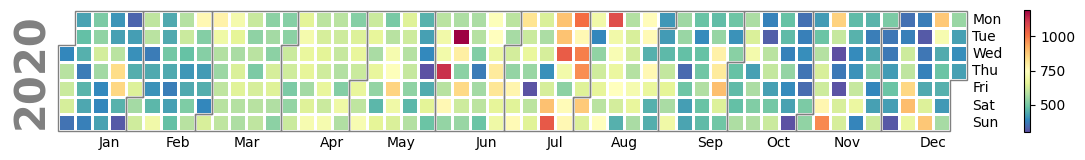

In [180]:
calplot.calplot(nj_2020['AQI'], cmap='Spectral_r')

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


(<Figure size 1250x170 with 2 Axes>,
 array([<Axes: ylabel='2020'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


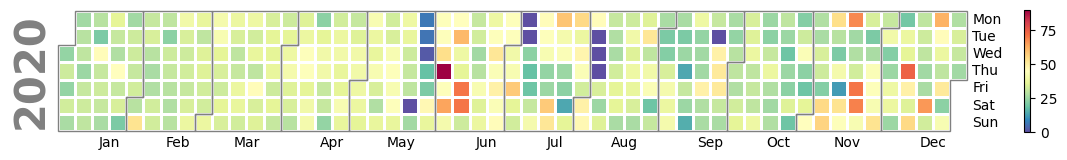

In [175]:
calplot.calplot(atlantic['AQI'], cmap='Spectral_r')

In [181]:
nj_2020.head()

,State Name,county Name,State Code,County Code,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
Date,,,,,,,,,
2020-01-01,New Jersey,Atlantic,34,1,24,Good,Ozone,34-001-0006,2
2020-01-02,New Jersey,Atlantic,34,1,32,Good,PM2.5,34-001-0006,1
2020-01-03,New Jersey,Atlantic,34,1,24,Good,Ozone,34-001-0006,1
2020-01-04,New Jersey,Atlantic,34,1,33,Good,PM2.5,34-001-0006,2
2020-01-05,New Jersey,Atlantic,34,1,27,Good,Ozone,34-001-0006,1


In [205]:
params_county = nj_2020.groupby(['county Name', 'Defining Parameter'])
means = pd.DataFrame(params_county['AQI'].mean())
means_by_param = means.reset_index()
#means_by_param.loc[means_by_param['Defining Parameter'] == 'PM2.5',:]
means_by_param

,county Name,Defining Parameter,AQI
0,Atlantic,Ozone,33.930328
1,Atlantic,PM2.5,37.878261
2,Bergen,CO,1.333333
3,Bergen,NO2,31.772727
4,Bergen,Ozone,41.729560
5,Bergen,PM2.5,45.852941
6,Camden,NO2,29.300000
7,Camden,Ozone,38.504950
8,Camden,PM2.5,46.032468
9,Cumberland,NO2,20.250000


In [214]:
means_pm25 = []
means_ozones = []
means_no2 = []
for index, row in means_by_param.iterrows():
    if row['Defining Parameter'] == 'PM2.5':
        means_pm25.append(row['AQI'])
    elif row['Defining Parameter'] == 'NO2':
        means_no2.append(row['AQI'])
    elif row['Defining Parameter'] == 'Ozone':
        means_ozones.append(row['AQI'])
print(means_pm25)
print(nj_2020['county Name'].unique())

[37.87826086956522, 45.85294117647059, 46.032467532467535, 41.25806451612903, 47.13475177304964, 29.34, 46.663366336633665, 42.0655737704918, 43.03846153846154, 41.818897637795274, 47.55555555555556, 30.347517730496453, 30.72222222222222, 42.56573705179283, 41.16528925619835]
['Atlantic' 'Bergen' 'Camden' 'Cumberland' 'Essex' 'Gloucester' 'Hudson'
 'Hunterdon' 'Mercer' 'Middlesex' 'Monmouth' 'Morris' 'Ocean' 'Passaic'
 'Union' 'Warren']


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (16,) and arg 1 with shape (15,).

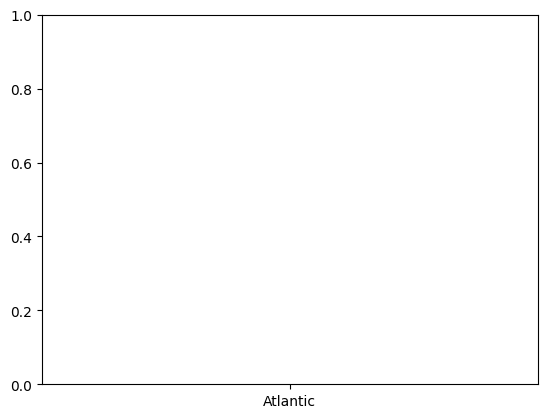

In [207]:
plt.bar(nj_2020['county Name'].unique(), means_pm25)
plt.xticks(rotation = 'vertical')
plt.ylabel('AQI')
plt.title("Average AQI by NJ county in 2020 by PM2.5")
plt.show()